In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_circles
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

#### Create dataset

In [68]:
features, target = make_circles(n_samples=1000, noise=0.05, factor=0.5)

In [69]:
dataset = pd.DataFrame.from_dict({'feature_1': features[:,0], 'feature_2': features[:,1], 'target': target})

In [70]:
X = dataset.loc[:, ['feature_1', 'feature_2']] 
y = dataset.loc[:, 'target']

In [71]:
dataset.head()

,feature_1,feature_2,target
0,0.517509,0.798825,0
1,0.900780,0.516794,0
2,-0.516943,-0.113735,1
3,-0.028565,0.513946,1
4,0.533536,0.119478,1


In [72]:
sns.set()

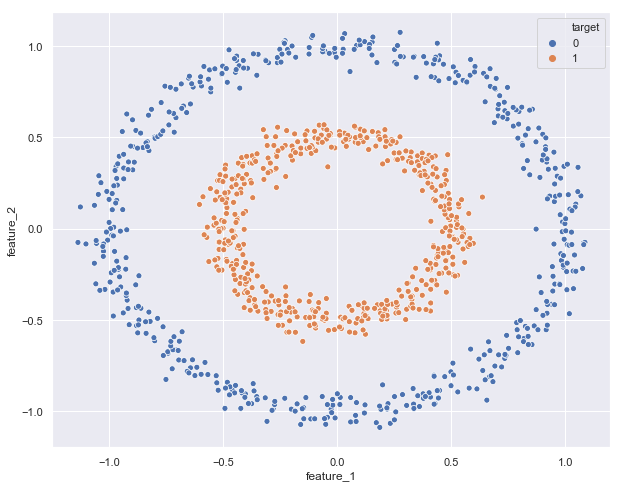

In [73]:
_fig, ax = plt.subplots(figsize=(10,8))

ax = sns.scatterplot(x='feature_1', y='feature_2', hue='target', data=dataset)

#### Classification on original dataset

In [42]:
clf = LinearSVC()

In [74]:
clf.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

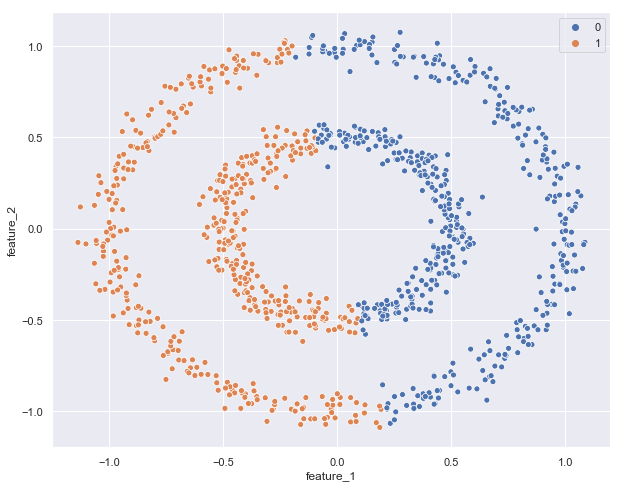

In [93]:
_fig, ax = plt.subplots(figsize=(10,8))

ax = sns.scatterplot(x='feature_1', y='feature_2', hue=pred, data=dataset)

In [76]:
pred = clf.predict(X)
print('Train accuracy: {}'.format(accuracy_score(y, pred)))

Train accuracy: 0.493


#### Polynomial Features

In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [133]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [134]:
X_trans = poly.fit_transform(X)

In [135]:
clf2 = LinearSVC()

In [136]:
clf2.fit(X=X_trans, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [137]:
pred2 = clf2.predict(X_trans)
print('Train accuracy: {}'.format(accuracy_score(y, pred2)))

Train accuracy: 1.0


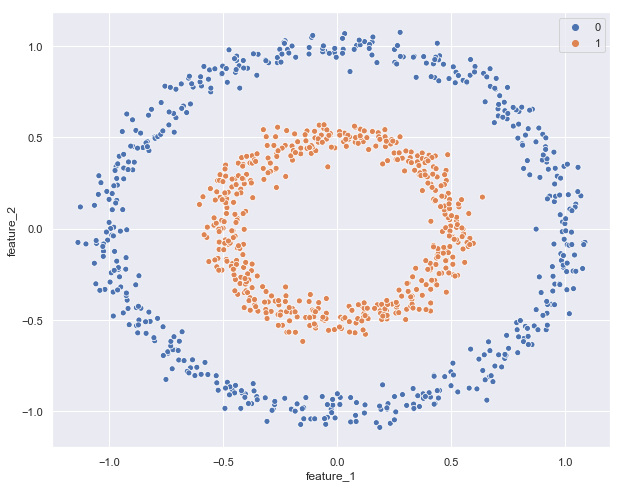

In [138]:
_fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x='feature_1', y='feature_2', hue=pred2, data=dataset)